# LOGISTIC CLASSIFIER FROM SCRATCH
### Log loss as loss function and Gradient descent as optimizer

In [153]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [154]:
iris = datasets.load_iris()
x = iris.data[:, :2]
y = (iris.target != 0) * 1

In [155]:
# shuffling data

arr = np.concatenate((x,y.reshape(150, 1)), axis=1)
np.random.shuffle(arr)
x = arr[:, :-1]
y = arr[:, -1]

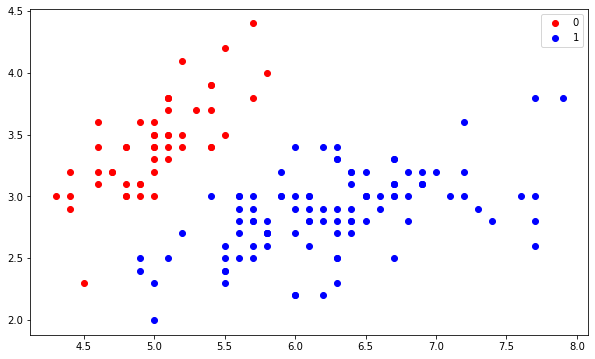

In [156]:
plt.figure(figsize=(10,6))
plt.scatter(x[y==0][:,0], x[y==0][:,1], c='r', label='0')
plt.scatter(x[y==1][:,0], x[y==1][:,1], c='b', label='1')
plt.legend()
plt.show()

In [157]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [158]:
# Log_loss

def calc_loss(y_pred, y_true):
    soma = np.sum((y_true * np.log(y_pred) + (1-y_true) * 
                   np.log(1 - y_pred)))
    return -soma/y_pred.size

In [159]:
# Gradient descent

def gradient(X, y_pred, y_true):
    return np.dot(X.T, (y_pred-y_true))/y_pred.size

In [160]:
def predict(X,w):
    return np.dot(X,w)

In [180]:
def calc_acc(y_hat, y):
    return ((y_hat.round() == y).mean() * 100).round(2)

In [181]:
def fit(X,y, num_iter, lr, loss_min, verbose=50):
    err = []
    curr_epoch = 0
    Xu = np.concatenate((np.ones((X.shape[0],1)),X), axis=1)
    weights = np.zeros(Xu.shape[1])
    
    while curr_epoch <= num_iter:
        z = predict(Xu,weights)
        h = sigmoid(z)
        
        loss = calc_loss(h, y)

        grad = gradient(Xu, h, y)

        weights -= lr*grad
        
        if curr_epoch%verbose == 0:
            acc = calc_acc(h, y)       
            print(f'Epoch: {curr_epoch} - Loss: {loss} - Accuracy: {acc}\n')
            
        
        err.append(loss)
        if loss <= loss_min:
            break
        curr_epoch = curr_epoch + 1
    return err, weights

In [183]:
err, weights = fit(x, y, 1500, 0.05, 0, verbose=300)

Epoch: 0 - Loss: 0.6931471805599454 - Accuracy: 33.33

Epoch: 300 - Loss: 0.2563882252895524 - Accuracy: 98.67

Epoch: 600 - Loss: 0.17121292780155528 - Accuracy: 99.33

Epoch: 900 - Loss: 0.13407082154491354 - Accuracy: 99.33

Epoch: 1200 - Loss: 0.11305387847167746 - Accuracy: 99.33

Epoch: 1500 - Loss: 0.09941408723830077 - Accuracy: 99.33



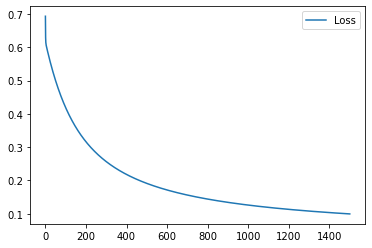

In [184]:
plt.plot(err, label='Loss')
plt.legend(loc='best')